In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import cmath

In [2]:
transform_length = 64
sampling_frequency = 1000
sampling_period = 1/sampling_frequency
f = []  #frequencies list
scaling = [] #scaling list for sin/cos parts of signal aka a*sin -> a is scaling factor
offset = 0

In [3]:
#populate frequencies and scalings lists 
seed = 20
random.seed(seed)
f_index = random.randint(1,9) #min to max number of static frequencies present in signal

for i in range(f_index):
    f.append(random.random()*sampling_frequency/2)
    scaling.append(random.gauss(1, 0.4))

In [4]:
f   #main frequencies of signal

[129.91372374448846, 436.0651870348553, 286.4703346246109]

In [5]:
def signal_gen(f, scaling, t, offset):
    sig = offset
    for i in range(len(f)):
        sig += scaling[i]*cmath.cos(2*math.pi*f[i]*t)
    return sig

In [6]:
data_in = np.zeros(transform_length, dtype =np.csingle)

In [7]:
for index, item in enumerate(data_in): 
    data_in[index] = signal_gen(f, scaling, index*sampling_period, offset)

In [8]:
data_in

array([ 1.9753945 +0.j, -0.29751042+0.j, -0.8619884 +0.j,  0.30732992+0.j,
        0.29181597+0.j, -1.1993712 +0.j, -0.41237748+0.j,  1.88841   +0.j,
       -0.24071962+0.j, -0.5409563 +0.j,  0.4394834 +0.j,  0.41115507+0.j,
       -1.471505  +0.j, -0.5241557 +0.j,  1.6508102 +0.j, -0.2776247 +0.j,
       -0.3177231 +0.j,  0.63577825+0.j,  0.6410507 +0.j, -1.6202763 +0.j,
       -0.5668054 +0.j,  1.325708  +0.j, -0.4064545 +0.j, -0.24941657+0.j,
        0.8281734 +0.j,  0.9198495 +0.j, -1.626934  +0.j, -0.49224213+0.j,
        0.99727476+0.j, -0.5888275 +0.j, -0.35160485+0.j,  0.95619476+0.j,
        1.1657197 +0.j, -1.515461  +0.j, -0.28790933+0.j,  0.74605775+0.j,
       -0.7628872 +0.j, -0.59334064+0.j,  0.98694646+0.j,  1.3006811 +0.j,
       -1.342649  +0.j,  0.01670448+0.j,  0.6259001 +0.j, -0.86453646+0.j,
       -0.9060582 +0.j,  0.92560786+0.j,  1.2741001 +0.j, -1.1782628 +0.j,
        0.3569356 +0.j,  0.64949185+0.j, -0.84988636+0.j, -1.2036103 +0.j,
        0.81309325+0.j,  

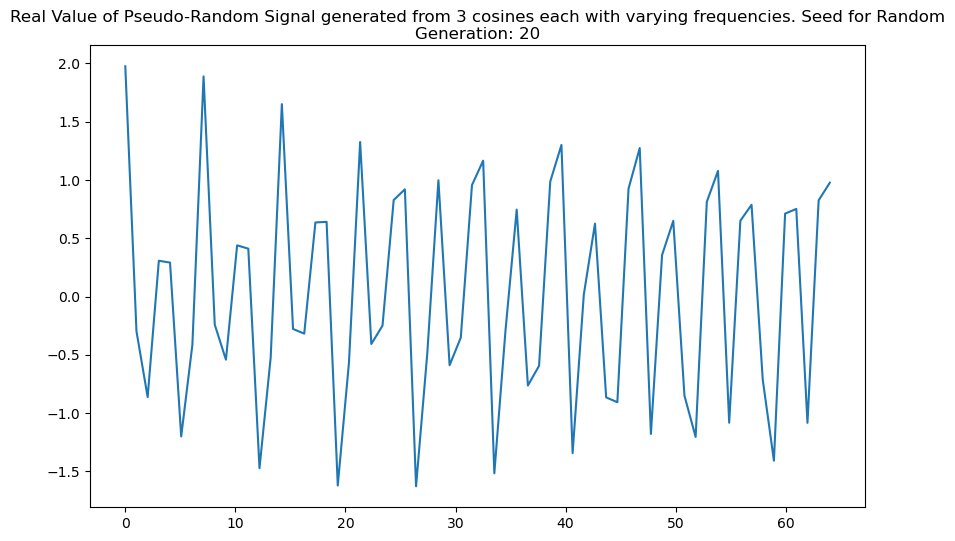

In [15]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(start=0, stop = transform_length, num = transform_length), data_in.real)
plt.title("Real Value of Pseudo-Random Signal generated from " + str(f_index) +" cosines each with varying frequencies. Seed for Random Generation: " + str(seed), wrap = True) 
plt.savefig("RealValueInput.png")

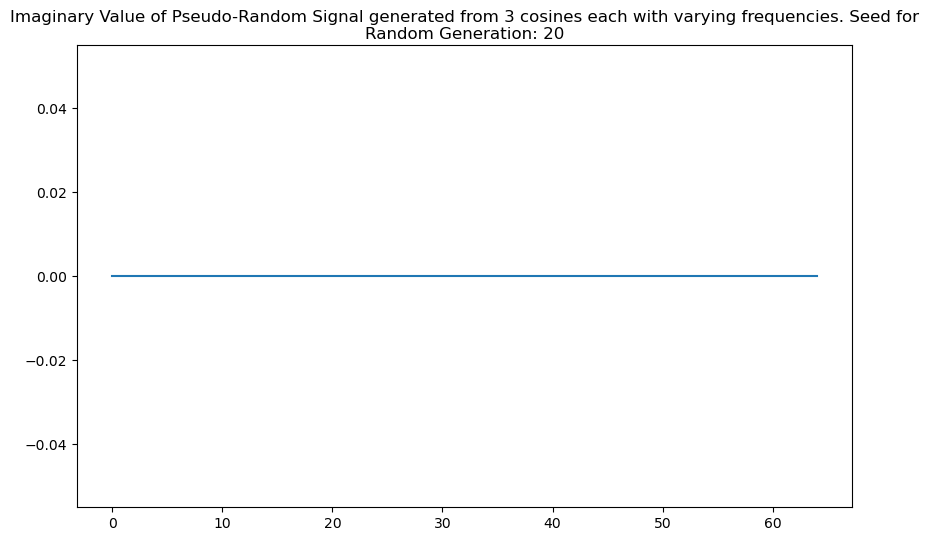

In [16]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(start=0, stop = transform_length, num = transform_length), data_in.imag)
plt.title("Imaginary Value of Pseudo-Random Signal generated from " + str(f_index) +" cosines each with varying frequencies. Seed for Random Generation: " + str(seed), wrap=True) 
plt.savefig("ImaginaryValueInput.png")

In [11]:
file_path = "signal.bin"
with open(file_path, "wb") as file:
    file.write(data_in.tobytes())